### In this notebook, we will create the perceptron algorithm and winnow algorithm modules and apply it on the MNIST dataset.

In [15]:
import sklearn as sk
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import scipy.io

## perceptron

In [16]:
minist = scipy.io.loadmat('mnist-original.mat')

In [17]:
X = minist['data'].T
y = minist['label']
y = np.apply_along_axis(lambda x: 1 if x==4 or x==9 else -1, 0, y).reshape(-1,1)

# normalize data
scalar = MinMaxScaler()
X=scalar.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000, random_state=671)

### Note that the function also output the test accuracy for each epoch.

In [19]:
def perceptron(X, y, X_test, y_test, I=100):
    # initialize w
    n, p = X.shape
    train_acc=[]
    test_acc=[]
    w = np.zeros((p,1))
    
    for e in range(I):
        for i in range(n):
            if (y[i]*X[i].reshape(1,-1)@w)[0][0] <= 0:
                w = w + (y[i]*X[i].reshape(-1,1))
        train_acc.append(np.sum(np.sign(X@w)==y)/len(y))
        test_acc.append(np.sum(np.sign(X_test@w)==y_test)/len(y_test))
    
    return w, train_acc, test_acc

### test

In [20]:
# train 
random.seed(671)

w, train_acc, test_acc = perceptron(X_train, y_train, X_test, y_test)

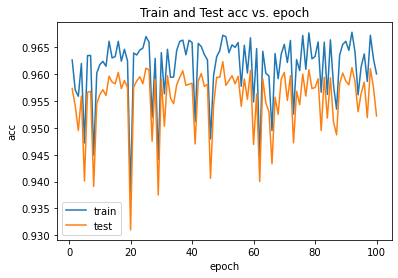

In [21]:
plt.plot(list(range(1,101)), train_acc, label='train')
plt.plot(list(range(1,101)), test_acc, label='test')
plt.title('Train and Test acc vs. epoch')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend()
plt.show()

### The test accuracy also reaches high accuracy after first epoch and does not improve later. The test accuracy has pattern similar to train accuracy does but test accuracy is a little lower.

## winnow

In [22]:
def balanced_winnow(X, y, X_test, y_test, I=100, ng=0.1):
    # initialize w
    n, p = X.shape
    w_p = np.ones((p,1)) /(2*p)
    w_n = np.ones((p,1)) /(2*p)
    train_acc=[]
    test_acc=[]
    
    for e in range(I):
        for i in range(n):
            if (y[i]*(X[i].reshape(1,-1)@w_p - X[i].reshape(1,-1)@w_n))[0][0] <= 0:
                w_p = w_p*np.exp(ng*y[i]*X[i].reshape(-1,1))
                w_n = w_n*np.exp(-ng*y[i]*X[i].reshape(-1,1))
                s = np.sum(w_p)+np.sum(w_n)
                w_p = w_p/s
                w_n = w_n/s
                
        train_acc.append(np.sum(np.sign(X@w_p-X@w_n)==y)/len(y))
        test_acc.append(np.sum(np.sign(X_test@w_p-X_test@w_n)==y_test)/len(y_test))
    
    return w_p, w_n, train_acc, test_acc

### test

In [23]:
# train 
random.seed(671)

w_p, w_n, train_acc, test_acc = balanced_winnow(X_train, y_train, 
                                         X_test, y_test,
                                         I =50, ng=0.1)

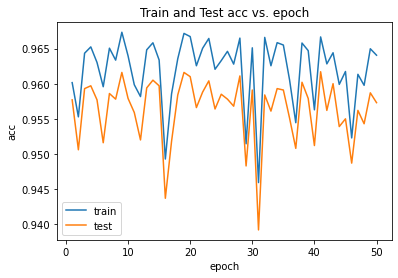

In [24]:
plt.plot(list(range(1,51)), train_acc, label='train')
plt.plot(list(range(1,51)), test_acc, label='test')
plt.title('Train and Test acc vs. epoch')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend()
plt.show()

### The train and test accuracy achieves relatively high accuracies after first epoch but remains roughly unchanged for later epochs. The overall stable state is achieved after first epoch.